# 0. Install and Import Dependencies

In [63]:
!pip list

Package                   Version
------------------------- -----------
absl-py                   2.1.0
altair                    5.3.0
arabic-reshaper           3.0.0
asgiref                   3.2.10
astunparse                1.6.3
attrs                     23.2.0
beautifulsoup4            4.12.3
blinker                   1.8.1
cachetools                5.3.3
certifi                   2024.2.2
chardet                   5.2.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
contourpy                 1.2.1
cycler                    0.12.1
Django                    3.1.2
filelock                  3.14.0
Flask                     3.0.3
flatbuffers               24.3.25
fonttools                 4.51.0
fsspec                    2024.3.1
gast                      0.5.4
gdown                     5.2.0
gitdb                     4.0.11
GitPython                 3.1.43
google-pasta              0.2.0
grpcio                    1.63.0
gunicorn       


[notice] A new release of pip is available: 24.0 -> 24.3
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [64]:
!pip install opencv-python matplotlib imageio gdown tensorflow


[notice] A new release of pip is available: 24.0 -> 24.3
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [65]:
pip install --upgrade pip

In [66]:
!pip show imageio

Name: imageio
Version: 2.35.1
Summary: Library for reading and writing a wide range of image, video, scientific, and volumetric data formats.
Home-page: https://github.com/imageio/imageio
Author: imageio contributors
Author-email: almar.klein@gmail.com
License: BSD-2-Clause
Location: C:\Python312\Lib\site-packages
Requires: numpy, pillow
Required-by: 


In [67]:
import sys
!"{sys.executable}" -m pip install imageio

In [68]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt

import imageio

In [69]:
import sys
print(sys.executable)

c:\Users\Siddarth VS\AppData\Local\Programs\Python\Python311\python.exe


In [70]:
tf.config.list_physical_devices('GPU')

[]

In [71]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

# 1. Build Data Loading Functions

In [72]:
import sys
!"{sys.executable}" -m pip install gdown


In [73]:
import gdown

In [74]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=382fcdd0-f1f6-4028-818c-e33b561bda55
To: c:\Users\Siddarth VS\Downloads\LipNet-main\LipNet-main\data.zip
100%|██████████| 423M/423M [07:07<00:00, 991kB/s]  


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [75]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [76]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [77]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [78]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [79]:
char_to_num(['n','i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11], dtype=int64)>

In [80]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [81]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [82]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [83]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [84]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [85]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

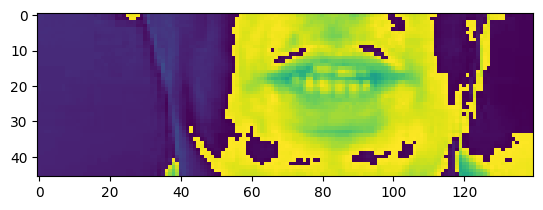

In [86]:
plt.imshow(frames[40])

In [87]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23], dtype=int64)>

In [88]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [89]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

In [90]:
from matplotlib import pyplot as plt

In [91]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [92]:
len(test)

50

In [93]:
frames, alignments = data.as_numpy_iterator().next()

In [94]:
len(frames)

2

In [95]:
sample = data.as_numpy_iterator()

In [96]:
val = sample.next(); val[0]

array([[[[[ 1.6026441 ],
          [ 1.3681108 ],
          [ 1.2508441 ],
          ...,
          [ 0.31271103],
          [ 0.23453328],
          [ 0.23453328]],

         [[ 1.3681108 ],
          [ 1.3681108 ],
          [ 1.3290219 ],
          ...,
          [ 0.31271103],
          [ 0.23453328],
          [ 0.23453328]],

         [[ 1.6417329 ],
          [ 1.6417329 ],
          [ 1.5244663 ],
          ...,
          [ 0.31271103],
          [ 0.27362216],
          [ 0.27362216]],

         ...,

         [[ 1.1726664 ],
          [ 1.0944886 ],
          [ 1.0944886 ],
          ...,
          [ 0.03908888],
          [ 0.        ],
          [ 9.967665  ]],

         [[ 1.0944886 ],
          [ 1.0944886 ],
          [ 1.0944886 ],
          ...,
          [ 0.        ],
          [ 0.        ],
          [ 9.967665  ]],

         [[ 1.0944886 ],
          [ 1.0944886 ],
          [ 1.0944886 ],
          ...,
          [ 0.        ],
          [ 0.        ],
          

In [97]:
print(val[0][0].shape)

(75, 46, 140, 1)


In [98]:
val_uint8 = np.squeeze(val[0][0], axis=-1).astype(np.uint8)  # Remove the last dimension
imageio.mimsave('./animation.gif', val_uint8, fps=10)  # Save the GIF

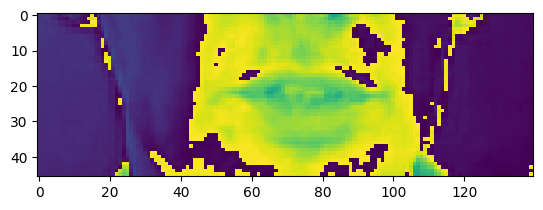

In [99]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [100]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'lay green with m six now'>

# 3. Design the Deep Neural Network

In [101]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [102]:
from tensorflow.keras.initializers import Orthogonal
from tensorflow.keras import layers

In [103]:
from tensorflow.keras.layers import GlobalAveragePooling2D

In [104]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [105]:
model = Sequential()

#model.add(Input(shape=(75, 46, 140, 1))) #remove custom input if needed

model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(GlobalAveragePooling2D()))

model.add(Bidirectional(LSTM(128, kernel_initializer=Orthogonal(), return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer=Orthogonal(), return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [106]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_3 (Conv3D)               │ (None, 75, 46, 140,    │         3,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 75, 46, 140,    │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_3 (MaxPooling3D)  │ (None, 75, 23, 70,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_4 (Conv3D)               │ (None, 75, 23, 70,     │       884,992 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 75, 23, 70,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_4 (MaxPooling3D)  │ (None, 75, 11, 35,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_5 (Conv3D)               │ (None, 75, 11, 35, 75) │       518,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 75, 11, 35, 75) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_5 (MaxPooling3D)  │ (None, 75, 5, 17, 75)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 75, 75)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 75, 256)        │       208,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 75, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75, 41)         │        10,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,020,724 (7.71 MB)

 Trainable params: 2,020,724 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

In [107]:
5*17*75

6375

In [108]:
yhat = model.predict(val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [109]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssskkkk'>

In [110]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssskkkk'>

In [111]:
model.input_shape

(None, 75, 46, 140, 1)

In [112]:
model.output_shape

(None, 75, 41)

# 4. Setup Training Options and Train

In [113]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [114]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [115]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [116]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [117]:
# Update the file extension to `.weights.h5`
checkpoint_callback = ModelCheckpoint(
    filepath=os.path.join('models', 'checkpoint.weights.h5'),
    monitor='loss',
    save_weights_only=True
)


In [118]:
#checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 

In [119]:
schedule_callback = LearningRateScheduler(scheduler)

In [120]:
example_callback = ProduceExample(test)

In [121]:
history= model.fit(train, validation_data=test, epochs=3, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step/step - loss: 107.6980
Original: bin red with n three again
Prediction: e e e e e e
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: place red by j four now
Prediction: e e e e e e
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 ━━━━━━━━━━━━━━━━━━━━ 6546s 15s/step - loss: 107.6545 - val_loss: 71.7515 - learning_rate: 1.0000e-04
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step/step - loss: 74.1845
Original: bin green in n three again
Prediction: le e e e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original: lay white by z seven again
Prediction: le e e e on
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
450/450 ━━━━━━━━━━━━━━━━━━━━ 7946s 18s/step - loss: 74.1825 - val_loss: 68.6837 - learning_rate: 1.0000e-04
Epo

In [128]:
from tensorflow.keras.models import load_model, save_model


In [129]:


model_save_name = 'lip_reader.keras'
path = "C:/Users/Siddarth VS/Downloads/LipNet-main/LipNet-main/" + model_save_name
save_model(model, path)


# 5. Make a Prediction 

In [130]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=47b0c7cf-999b-462d-95a7-3412c1395d3e
To: c:\Users\Siddarth VS\Downloads\LipNet-main\LipNet-main\checkpoints.zip
100%|██████████| 94.5M/94.5M [01:03<00:00, 1.48MB/s]


['models\\checkpoint.index',
 'models\\__MACOSX/._checkpoint.index',
 'models\\checkpoint.data-00000-of-00001',
 'models\\__MACOSX/._checkpoint.data-00000-of-00001',
 'models\\checkpoint',
 'models\\__MACOSX/._checkpoint']

In [133]:
import tensorflow as tf

# Create a checkpoint object and specify the model to restore
checkpoint = tf.train.Checkpoint(model=model)

# Restore the checkpoint. This automatically maps weights to your model's architecture.
checkpoint.restore('models/checkpoint').expect_partial()  # Use expect_partial() if not all variables are needed


In [134]:
#model.load_weights('models/checkpoint')

In [135]:
test_data = test.as_numpy_iterator()

In [136]:
sample = test_data.next()

In [137]:
yhat = model.predict(sample[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [138]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'place blue in i one soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'set blue with u four now'>]

In [139]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [140]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'la e a'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'la e o'>]

# Test on a Video

In [141]:
sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))

In [142]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin red at s nine again'>]

In [143]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


In [144]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [145]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'la e ao'>]